In [9]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [11]:
heart_disease.data

{'ids': None,
 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   1       145   233    1        2      150      0      2.3   
 1     67    1   4       160   286    0        2      108      1      1.5   
 2     67    1   4       120   229    0        2      129      1      2.6   
 3     37    1   3       130   250    0        0      187      0      3.5   
 4     41    0   2       130   204    0        2      172      0      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   45    1   1       110   264    0        0      132      0      1.2   
 299   68    1   4       144   193    1        0      141      0      3.4   
 300   57    1   4       130   131    0        0      115      1      1.2   
 301   57    0   2       130   236    0        2      174      0      0.0   
 302   38    1   3       138   175    0        0      173      0      0.0   
 
      slope   ca  thal  
 0        3  0.0   6.0 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo

In [13]:
# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features  # Features
y = heart_disease.data.targets   # Target variable

In [14]:
print(X.isnull().sum()) # Check missing values in features
print(y.isnull().sum())  # Check missing values in target variable

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64
num    0
dtype: int64


In [15]:
# Drop rows with NaN values
X.dropna(inplace=True)
y = y.loc[X.index]  # Ensure target matches feature rows

C:\Users\S209160\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
print(X.isnull().sum().sum())  # Should print 0 if all NAs are handled

0


In [17]:
# Exploratory Data Analysis (EDA)
print("Dataset Overview:\n", X.info())
print("Summary Statistics:\n", X.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 32.5 KB
Dataset Overview:
 None
Summary Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.6936

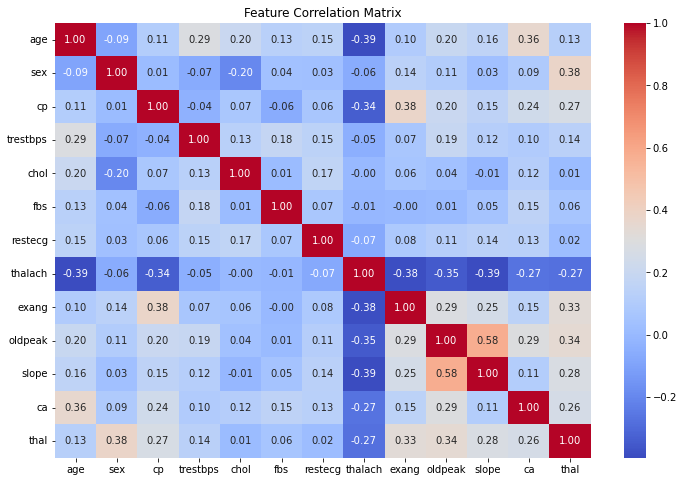

In [18]:
# Visualizing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Build Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [21]:
# Predictions
y_pred = clf.predict(X_test)

In [22]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5833333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        36
           1       0.00      0.00      0.00         9
           2       0.06      0.20      0.10         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.18      0.23      0.20        60
weighted avg       0.50      0.58      0.54        60

Confusion Matrix:
 [[34  0  2  0  0]
 [ 4  0  5  0  0]
 [ 2  0  1  2  0]
 [ 1  1  5  0  0]
 [ 0  0  3  0  0]]


C:\Users\S209160\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S209160\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S209160\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


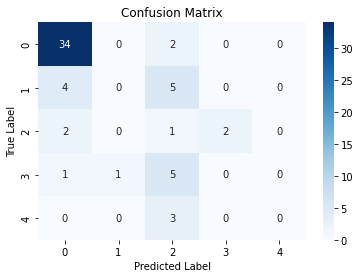

In [23]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1', '2', '3', '4'], 
            yticklabels=['0', '1', '2', '3', '4'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

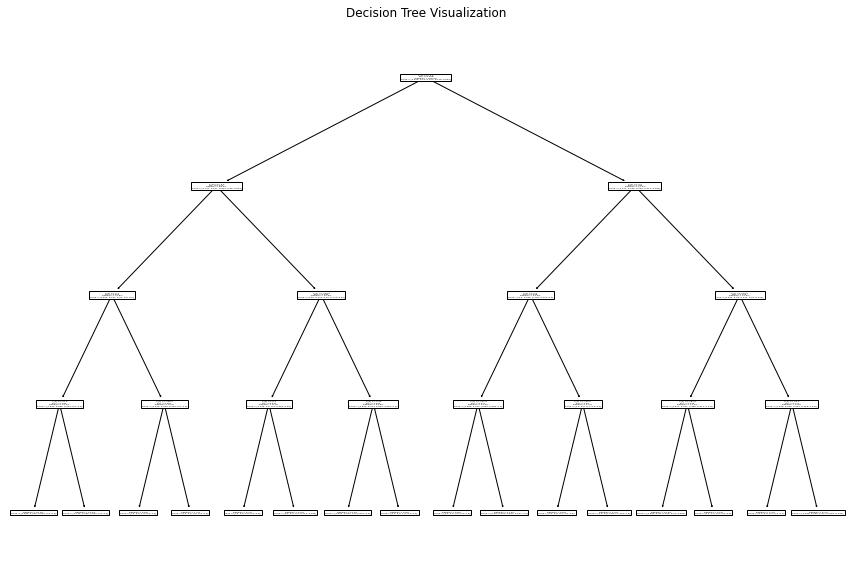

In [24]:
# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, proportion=True)
plt.title("Decision Tree Visualization")
plt.show()

In [25]:
# Build Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [26]:
# Predictions with Random Forest
y_pred_rf = rf_clf.predict(X_test)

In [27]:
# Model Evaluation for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.6
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        36
           1       0.00      0.00      0.00         9
           2       0.14      0.20      0.17         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.19      0.23      0.21        60
weighted avg       0.49      0.60      0.54        60

Random Forest Confusion Matrix:
 [[35  1  0  0  0]
 [ 5  0  3  1  0]
 [ 2  1  1  1  0]
 [ 1  2  3  0  1]
 [ 1  2  0  0  0]]


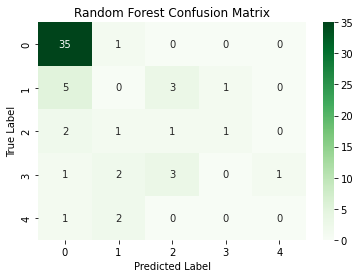

In [28]:
# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', 
            xticklabels=['0', '1', '2', '3', '4'], 
            yticklabels=['0', '1', '2', '3', '4'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()